<div style="text-align: center; margin: 50px">

<h1 style="text-align: center;">Oracles and Deutsch-Josza Algorithm in Qiskit</h1>
<h2>Team Rulo_qBraid</h2>
    <h4>(We are open to more suggestions and code!)</h4>
</div>

# Overview 
1. [Introduction](#introduction) <br>
2. [The Deutsch-Josza Oracle](#djoracle) <br>
3. [More ideas](#challenge) <br>

<a id="introduction"></a>
# 1. Introduction

As part of QCHack 2021 Challenge List, we have seen/heard **oracles** in the context of Grover's algorithm (Microsoft challenge). However, this team thinks that it could be also great to have some code in Qiskit to discover, analyze and get some fun with oracles. Due to the few knowledge/ experience, we decided to understand and implement Deutsch-Josza (DJ) algorithm that we will use to determine if a function is constant or balanced with just one check, expressing the function as ... Yes! As an **oracle**. For us, DJ Algorithm is really simple to understand and implement, so we hope you enjoy this notebook.

### <a id="djoracle"></a>
# 2. The Deutsch-Josza Algorithm (oracle coming soon)

The Deutsch-Josza (DJ) algorithm allows us to determine if the function is constant or balanced with just one check, remembering we express the function as an **oracle**. We know that we want our quantum states to be modified by the application of the function, so that we can figure out if the function is constant or balanced. Therefore, we will have to express the function in the form of an operator, or a gate. Also, just like all other quantum operators, the gate we make for the function will have to be reversible. An **oracle** is exactly this reversible gate form of the function we want to check.

This is true for a lot of quantum algorithms, so we need to express the problem in terms of an oracle to make a quantum circuit to solve it. In this notebook, we will look at how a function that takes in a 1-bit input can be expressed as an oracle for the DJ algorithm.

For the DJ algorithm, we will call our oracle $U_f$. Here is what the oracle we will look like:


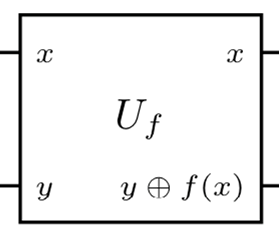


The oracle takes two qubits as inputs - $x$ and $y$. It performs an **XOR** operation on $y$ - the output is $y \oplus f(x)$. $x$ is unchanged. Let us check if this produced unique outputs:

For the first case,

| Input $$x$$ | Input $$y$$ |$$f(x)$$|$$y \oplus f(x)$$|
|:----:|:------:|:------:|:------:|
| 0 | 0 | 0 | 0 |
| 0 | 1 | 0 | 1 |
| 1 | 0 | 0 | 0 |
| 1 | 1 | 0 | 1 |

Here, we notice that $y \oplus f(x) = y$, which makes sense since $f(x) = 0$ and $y \oplus 0 = y$

For the second case,

| Input $$x$$ | Input $$y$$ |$$f(x)$$|$$y \oplus f(x)$$|
|:----:|:------:|:------:|:------:|
| 0 | 0 | 1 | 1 |
| 0 | 1 | 1 | 0 |
| 1 | 0 | 1 | 1 |
| 1 | 1 | 1 | 0 |

Here, we notice that $y \oplus f(x) = \bar{y}$, which makes sense since $f(x) = 1$ and since $y \oplus 1 = \bar{y}$

For the third case,

| Input $$x$$ | Input $$y$$ |$$f(x)$$|$$y \oplus f(x)$$|
|:----:|:------:|:------:|:------:|
| 0 | 0 | 0 | 0 |
| 0 | 1 | 0 | 1 |
| 1 | 0 | 1 | 1 |
| 1 | 1 | 1 | 0 |

Here, we notice that $y \oplus f(x) = y \oplus x$, which makes sense, since $f(x) = x$. This is a CNOT between x and y!

For the last case,

| Input $$x$$ | Input $$y$$ |$$f(x)$$|$$y \oplus f(x)$$|
|:----:|:------:|:------:|:------:|
| 0 | 0 | 1 | 1 |
| 0 | 1 | 1 | 0 |
| 1 | 0 | 0 | 0 |
| 1 | 1 | 0 | 1 |

Here, we notice that $y \oplus f(x) = y \oplus \bar{x}$, which makes sense, since $f(x) = \bar{x}$. This is a CNOT between $\bar{x}$ and y!


Notice how, by using the oracle formulation, we've transformed the problem into a reversible operator on the inputs.

Let us make each of these oracles. We will define a function for the constant oracles, and a separate function for the balanced oracles. Each function will have two inputs (which of the two choices for constant or balanced oracle we want) and the quantum circuit to which we want to add the oracle.

First let us define the constant oracle function. Here, we'll fix the convention that if the first input is 0, we want the case where $f(x) = 0$, and if it is one, we want $f(x) = 1$

In [1]:
def constant_oracle(n,qc):
    if (n==0):  # We want to oracle with f(x) = 0
        pass
    else:  # We want to oracle with f(x) = 1
        qc.x(1)

Next, let us define the balanced oracle function. Here, we'll fix the convention that if the first input is 0, we want the case where $f(x) = x$, and if it is one, we want $f(x) = \bar{x}$

In [2]:
def balanced_oracle(n,qc):
    if (n==0):  # We want the balanced oracle where f(x) = x. In this case, the outputs correspond to a CNOT function
        qc.cx(0,1)
    else: # We want the balanced oracle where f(x) = \bar{x}
        qc.x(0)
        qc.cx(0,1)

In [3]:
# Don't forget to import our favorite library: Qiskit
import qiskit as q

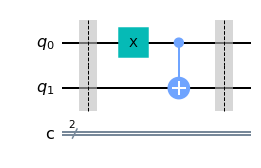

In [8]:
# Let's create a simple quantum circuit to show our oracle. In this notebook,
# we use barriers to divide some importan steps/ changes (e.g. our oracle)
qc = q.QuantumCircuit(2,2)
qc.barrier()
oracle = balanced_oracle(1,qc)
qc.barrier()
qc.draw('mpl')

<a id="djfull"></a>
## 3.2 The Deutsch-Josza Algorithm implementation

Now, we will implement the full DJ algorithm. First, let's create a function to call one of our oracles at random. Our problem will be to figure out if the oracle is constant or balanced.

In [9]:
from random import getrandbits

In [10]:
def random_oracle(qc):
    if(getrandbits(1)==0):
        constant_oracle(getrandbits(1),qc)
    else:
        balanced_oracle(getrandbits(1),qc)

Here are the steps of the DJ algorithm for a single-bit function:
1. Initiate a quantum circuit of two qubits
2. Apply an X gate to $q_1$
3. Apply H gates to both $q_0$ and $q_1$
4. Apply the oracle to $q_0$ and $q_1$
5. Apply H gates to both $q_0$ and $q_1$
6. Measure $q_0$. If the result is 0, the oracle is constant. If it is 1, the oracle is balanced.

Notice that we only invoked the oracle (i.e. applied the function) once in this algorithm.

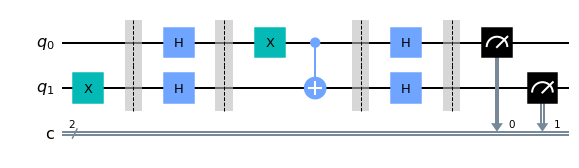

In [18]:
qc = q.QuantumCircuit(2,2)
qc.x(1)    # Step 2
qc.barrier()
qc.h(0)    # Step 3
qc.h(1)    # Step 3
qc.barrier()
random_oracle(qc)  # Step 4
qc.barrier()
qc.h(0) # Step 5
qc.h(1) # Step 5
qc.barrier()
qc.measure([0,1],[0,1]) # Step 6
qc.draw('mpl')

In [19]:
# Let's see the results
backend = q.Aer.get_backend('qasm_simulator')
job = q.execute (qc, backend, shots = 1024)
results = job.result()
counts = results.get_counts(qc)
print(counts)

{'11': 1024}


<a id="challenge"></a>
## One possible idea to develop in the future

In this notebook we looked at the Deutsch-Josza oracle for a function that takes a single-bit as input. Is it possible to create an implementation of the Deutsch-Josza oracle for a function that takes 2-bit inputs?

If the function still produces 1-bit output, in this case, the function is constant if the output is 0 for all 4 input combinations, and it is balanced if the output is 0 for two input combinations and 1 for the other two. Maybe we have to understand how to implement the DJ algorithm with this oracle. Can we generalize this to n bits?